<div style="text-align:center" > <h1> Sentiment Analysis Of Airline Tweets </h1> </div>

#### Overview

The dataset contains the tweets from the airline customers, it was scrapped in 2015.
The contributors were asked to classify the tweet among the positive, neutral, or negative.

We'll create a model to predict the sentiment of tweet by customer.
We can flag the tweet as per the sentiment.

Later on this model can used by the airline customer support to reach out to the 
customer and contact. 

<div style="text-align:center">
    <img src="https://i.giphy.com/media/cEzVKXcp5t8SzHwh6S/giphy.webp" width = 300/>
    </div>
    <div style="text-align:center">
    <small><a href='https://giphy.com/gifs/southwestair-southwest-swa-southwestairlines-cEzVKXcp5t8SzHwh6S'>© giphy</a></small>
    </div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./DATA/airline_tweets.csv')

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [6]:
# helper functions
def resize_plot(width,height):
    return plt.figure(figsize=(width,height), dpi=100)

def rotate_ticks(rotation):
    return plt.xticks(rotation = rotation)


<AxesSubplot:xlabel='airline', ylabel='count'>

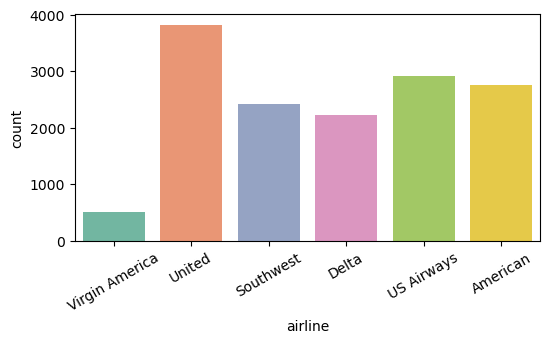

In [7]:
resize_plot(6,3)
rotate_ticks(30);
sns.countplot(data=df, x="airline", palette = "Set2")

<AxesSubplot:xlabel='airline', ylabel='count'>

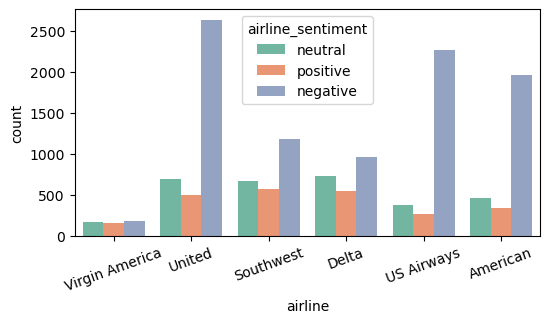

In [8]:
resize_plot(6,3)
rotate_ticks(20)
sns.countplot(data=df, x="airline", hue="airline_sentiment", palette = "Set2")

<AxesSubplot:xlabel='count', ylabel='negativereason'>

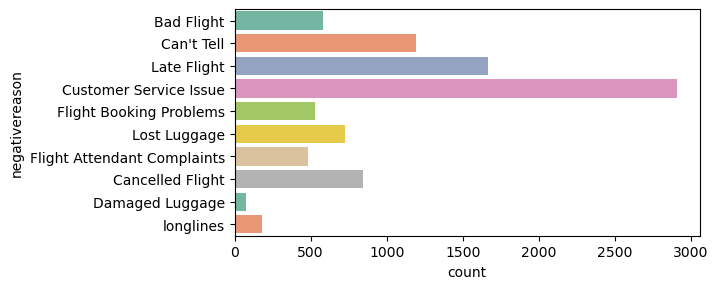

In [9]:
resize_plot(6,3)
sns.countplot(data=df, y="negativereason", palette = "Set2")

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

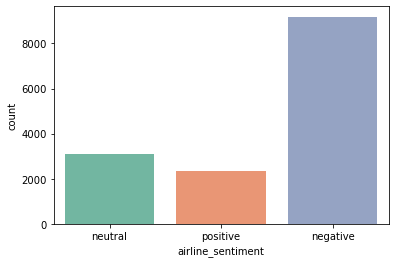

In [10]:
sns.countplot(data=df, x="airline_sentiment", palette = "Set2")

In [11]:
df["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

    As we can observe, most of the tweets negative, which intuitively makes sense.
    Customers are more likely to tweet if they have complain about something.

##### Features and labels

In [12]:
data = df[["airline_sentiment","text"]]

In [13]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [14]:
X = df["text"]
y = df["airline_sentiment"]

##### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

##### Vectorization 

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [17]:
tfidf = TfidfVectorizer(stop_words="english")

In [18]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [19]:
tfidf_X_train = tfidf.transform(X_train)
tfidf_X_test = tfidf.transform(X_test)

In [20]:
tfidf_X_train

<11712x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 107073 stored elements in Compressed Sparse Row format>

### Model comparisons - Naive Bayes, Logistic Regression, LinearSVC 

In [21]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(tfidf_X_train,y_train)

MultinomialNB()

In [22]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(tfidf_X_train,y_train)

LinearSVC()

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(tfidf_X_train,y_train)

LogisticRegression(max_iter=1000)

#### Performance Evaluation 

In [24]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [25]:
def get_report(model):
    preds = model.predict(tfidf_X_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,tfidf_X_test,y_test)
    

MultinomialNB
              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



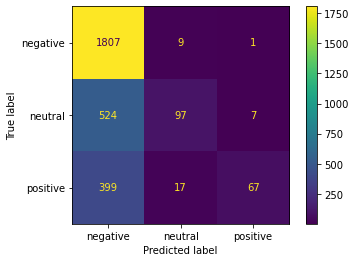

In [26]:
print("MultinomialNB")
get_report(mnb)

LogisticRegression
              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.82      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



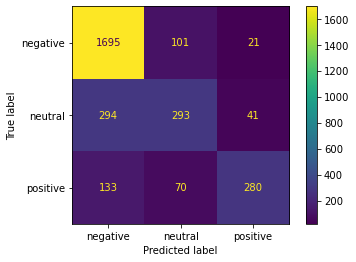

In [27]:
print("LogisticRegression")
get_report(lr)

LinearSVC
              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



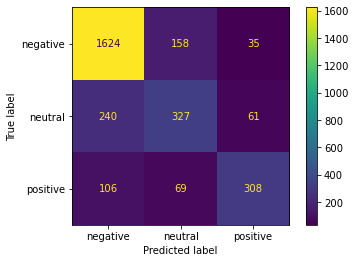

In [28]:
print("LinearSVC")
get_report(svc)

### Finalizing a pipeline of deployment for new tweets

Once we're satisfied with the model's performance, we'll create a pipeline that 
can take a tweet directly.

In [29]:
from sklearn.pipeline import Pipeline

In [30]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [31]:
pipe.fit(df["text"],df["airline_sentiment"])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [32]:
new_tweet = ['good flight']
pipe.predict(new_tweet)

array(['positive'], dtype=object)

In [33]:
new_tweet = ['bad flight']
pipe.predict(new_tweet)

array(['negative'], dtype=object)

In [34]:
new_tweet = ['ok ok flight']
pipe.predict(new_tweet)

array(['neutral'], dtype=object)

In [35]:
# for the gif that we used at top
new_tweet = ['that plane awesome']
pipe.predict(new_tweet)

array(['positive'], dtype=object)

<div style="text-align:center">
    <img src="https://media3.giphy.com/media/eMmXpS3nHJM4VeJ0o0/giphy.gif?cid=790b761170225525bcbaba7205439a608735486ff68e92f5&rid=giphy.gif&ct=g" width = 300/>
    </div>
    <div style="text-align:center">
    <small><a href='https://giphy.com/gifs/southwestair-southwest-swa-southwestairlines-cEzVKXcp5t8SzHwh6S'>© Heart Love GIF By Lufthansa Group Communications at giphy</a></small>
    </div>

In [36]:
# Thank you!